In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import numpy as np
import scqubits as scq
from matplotlib import pyplot as plt
from labellines import labelLines
import h5py
from hdf5Reader  import *

#0.5  605
#0 -1.26


In [2]:
def plot_transition_spectrum_data(fileDict,fluxonium,evals_count,point,halfc,zeroc):
    
    def current(c):
        phi=c*(0.5/(halfc-zeroc))-zeroc*(0.5/(halfc-zeroc))
        return phi
    
    #import data from labber(use VNA)
    fig, axes =plt.subplots()
    data =hdf5Handle('yo','uA',fileDict)
    data.slice()
    output_exp = np.abs(data.z)
    extent = current(data.y[0]/10**-6),current(data.y[-1]/10**-6), data.x[0]/10**9, data.x[-1]/10**9
    plt.imshow(output_exp, origin="lower", aspect = "auto", cmap = "viridis", interpolation = "None", extent=extent)
    
    #solve eigen energy
    flux_list = np.linspace(current(data.y[0]/10**-6), current(data.y[-1]/10**-6), point)
    eigval = fluxonium.get_spectrum_vs_paramvals("flux", flux_list, evals_count).energy_table
    eigval_list = eigval.T
    
    
    N = np.shape(eigval_list)[0]
    # probable transition:
    # 0-f, 1-f
    spectrum_list_0 = np.zeros((N-1, len(flux_list)))
    spectrum_list_1 = np.zeros((N-2, len(flux_list)))
    
    for i in range(N-1):
        spectrum_list_0[i] = eigval_list[i+1] - eigval_list[0]
    for i in range(N-2):
        spectrum_list_1[i] = eigval_list[i+2] - eigval_list[1]
 

    
    for idx in range(np.shape(spectrum_list_0)[0]):
        plt.plot(flux_list, spectrum_list_0[idx],"-",alpha=0.5,label=f"{idx+1},0") # 0-f
        if idx !=0:
            plt.plot(flux_list, spectrum_list_0[idx]/2,"--", alpha=0.5,label=f"{idx+1},0 2p")#Two photon0-f
    for idx in range(np.shape(spectrum_list_1)[0]):
        plt.plot(flux_list, spectrum_list_1[idx],"-", alpha=0.5,label=f"{idx+2},1")#1-f
        plt.plot(flux_list, spectrum_list_1[idx]/2,"--" ,alpha=0.7,label=f"{idx+2},1 2p")#Two photon1-f
        
    plt.xlabel(r"$\frac{\phi_{ext}}{2\pi}$", fontsize=20)
    plt.ylabel("Frequency(GHz)", fontsize=16)
    plt.title("Transition spectrum", fontsize=16)
    plt.xlim([ current(data.y[0]/10**-6),current(data.y[-1]/10**-6)])
    plt.ylim([data.x[0]/10**9,data.x[-1]/10**9])
    labelLines(axes.get_lines(), zorder=1.5)

Choose the log channel index from below:
0: ZVA24_1 - S21_deembed
1: ZVA24_1 - S21
=>1


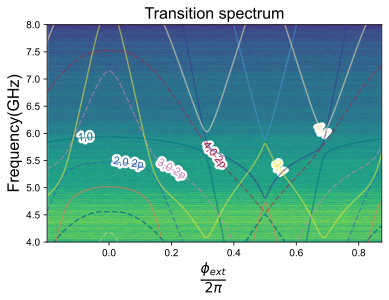

In [8]:
# %matplotlib notebook
fluxonium = scq.Fluxonium(
    EJ=6.305,
    EC=0.77,
    EL=0.94,
    cutoff = 30,
    flux = 0.5
)
#     EJ=6.305,
#     EC=0.77,
#     EL=0.94,
fileDict = r'D:\2.hdf5'#input file path(only for VNA)
evals_count=5
plot_transition_spectrum_data(fileDict,fluxonium,evals_count,301,605,-1260) #(file path,fluxonium,evals_count,flux resolution,half quanta current(uA),integer quanta)

In [ ]:
def plot_transition_spectrum(phi_ext_list, eigval_list):
    fig, axes =plt.subplots()
    fileDict = r'D:\1.hdf5'
    data =hdf5Handle('yo','uA',fileDict)
    data.slice()
    output_exp = np.abs(data.z)
    extent = data.y[0]/10**-6,data.y[-1]/10**-6, data.x[0]/10**9, data.x[-1]/10**9
    plt.imshow(output_exp, origin="lower", aspect = "auto", cmap = "RdBu_r", interpolation = "None", extent=extent)
    N = np.shape(eigval_list)[0]
    # probable transition:
    # 0-f, 1-f
    spectrum_list_0 = np.zeros((N-1, len(phi_ext_list)))
    spectrum_list_1 = np.zeros((N-2, len(phi_ext_list)))
    
    for i in range(N-1):
        spectrum_list_0[i] = eigval_list[i+1] - eigval_list[0]
    for i in range(N-2):
        spectrum_list_1[i] = eigval_list[i+2] - eigval_list[1]
 
    plt.xlabel(r"$\frac{\phi_{ext}}{2\pi}$", fontsize=20)
    plt.ylabel("Frequency(GHz)", fontsize=16)
    plt.title("Transition spectrum", fontsize=16)
    
    #plt.plot(phi_ext_list, spectrum_list_0[0], "k")
    #plt.plot(phi_ext_list, spectrum_list_1[2], "k")
    for idx in range(np.shape(spectrum_list_0)[0]):
        plt.plot(phi_ext_list, spectrum_list_0[idx],label=f"{idx+1},0")
#         if idx !=0:
#             plt.plot(phi_ext_list, spectrum_list_0[idx]/2,"--",label=f"{idx+1},0 2p")
    for idx in range(np.shape(spectrum_list_1)[0]):
        plt.plot(phi_ext_list, spectrum_list_1[idx], alpha=0.7,label=f"{idx+2},1")
#         plt.plot(phi_ext_list, spectrum_list_1[idx]/2,"-" ,alpha=0.7,label=f"{idx+2},1 2p")
    labelLines(axes.get_lines(), zorder=1.5)

In [ ]:
fluxonium_031 = scq.Fluxonium(
    EJ=5.97,
    EC=0.84,
    EL=0.746,
    cutoff = 30,
    flux = 0.5
)

In [ ]:
# %matplotlib notebook
flux_list = np.linspace(0.45, 0.55, 201)
eigval = fluxonium_031.get_spectrum_vs_paramvals("flux", flux_list, evals_count=3).energy_table
eigval = eigval.T

plot_transition_spectrum(flux_list, eigval)
plt.grid()